 1. Can we use Bagging for regression problems?
- Yes. Bagging can be used for both classification and regression. For regression, it aggregates predictions by averaging the outputs of individual base regressors.
2. Difference between multiple model training and single model training?

- Single model: One algorithm is trained on the entire dataset.

- Multiple models: Several models are trained on different subsets or views, and their outputs are combined to improve performance and reduce variance.
3. Feature randomness in Random Forest
- Random Forest selects a random subset of features at each split in the tree to increase diversity and reduce correlation among trees.

4. OOB (Out-of-Bag) Score
- OOB score evaluates model performance using only data not selected in bootstrap samples. It's a form of internal cross-validation.

5. Feature importance in Random Forest
Measured using:

- Mean decrease in impurity (Gini/Entropy)

- Permutation importance (drop in accuracy when feature is shuffled)

6. Working of a Bagging Classifier
- Random subsets (with replacement) of the training data are created.

- A base model (like a decision tree) is trained on each subset.

- Predictions are aggregated (majority vote for classification).

7. Evaluating Bagging Classifier
- Use metrics like accuracy, precision, recall, F1-score, AUC, or cross-validation on a test or validation set.

8. Bagging Regressor
- Same process as classifier, but predictions are aggregated using mean instead of majority vote.

9. Main advantage of ensemble techniques
- Improves generalization and reduces overfitting/variance compared to single models.

10. Main challenge of ensemble methods
- High computational cost

- Interpretability

- Complexity in tuning and understanding behavior

11. Key idea of ensemble techniques
- Combine predictions from multiple models to achieve better performance than any single model.

12. Random Forest Classifier
- An ensemble of decision trees trained using bagging and random feature selection at splits.

13. Types of ensemble techniques
- Bagging

- Boosting

- Stacking

- Voting

14. Ensemble learning
- A method where multiple models are combined to solve a single problem and improve overall performance.

15. When to avoid ensemble methods
- When interpretability is crucial

- When the base model performs very well alone

- For resource-constrained environments

16. Bagging and overfitting
- Bagging reduces variance by averaging predictions over multiple models, which helps prevent overfitting.

17. Random Forest vs. Decision Tree
Random Forest:

- Reduces overfitting

- More accurate and robust

- Handles missing data better

18. Bootstrap sampling in Bagging
- Bootstrap samples introduce diversity by training each model on a different random subset, reducing overfitting.

19. Real-world applications
- Fraud detection

- Medical diagnosis

- Stock market prediction

- Recommendation systems

20. Bagging vs. Boosting

- Aspect	    Bagging	               Boosting
Goal	      Reduce variance	       Reduce bias
Training	  Parallel	             Sequential
Weights	    Equal for all models	 More weight on hard samples
Overfitting	  Less prone	           Can overfit if not controlled

In [2]:

#21
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Changed base_estimator to estimator
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [4]:
#22
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # Import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Changed base_estimator to estimator
reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))




MSE: 3237.526541353384


In [5]:
#23
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for name, imp in zip(load_breast_cancer().feature_names, importances):
    print(f"{name}: {imp:.4f}")


mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [6]:
#24
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
dt_reg = DecisionTreeRegressor(random_state=42)

rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Random Forest R2: 0.8531093915343916
Decision Tree R2: 0.7486772486772486


In [7]:
#25
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9547738693467337


In [10]:
#26
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42) # Changed base_estimator to estimator
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9415204678362573
Accuracy: 0.9415204678362573


In [11]:
#27
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Trees: {n}, Accuracy: {accuracy_score(y_test, rf.predict(X_test))}")


Trees: 10, Accuracy: 0.9649122807017544
Trees: 50, Accuracy: 0.9707602339181286
Trees: 100, Accuracy: 0.9707602339181286
Trees: 200, Accuracy: 0.9707602339181286


In [13]:

#28
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier # Ensure BaggingClassifier is imported here

# Changed base_estimator to estimator
bag_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bag_lr.fit(X_train, y_train)
y_proba = bag_lr.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, y_proba))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.9977954144620812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#29
rf_reg.fit(X_train, y_train)
for name, score in zip(load_diabetes().feature_names, rf_reg.feature_importances_):
    print(f"{name}: {score:.4f}")


age: 0.0016
sex: 0.0181
bmi: 0.0040
bp: 0.0046
s1: 0.0029
s2: 0.0014
s3: 0.0029
s4: 0.3876
s5: 0.0020
s6: 0.0034


In [16]:

#30
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Changed base_estimator to estimator
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble = VotingClassifier(estimators=[('bag', bag), ('rf', rf)], voting='hard')
ensemble.fit(X_train, y_train)
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble.predict(X_test)))


Ensemble Accuracy: 0.9473684210526315


In [17]:
#31
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
print("Best Params:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)


Best Params: {'max_depth': None, 'n_estimators': 50}
Best Accuracy: 0.9622920938710413


In [19]:
#32
#32
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor # Make sure this is imported
from sklearn.tree import DecisionTreeRegressor # Make sure this is imported
from sklearn.metrics import mean_squared_error # Make sure this is imported

# Assuming X_train, y_train, X_test, y_test are defined from previous cells

for est in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    # Changed 'base_estimator' to 'estimator'
    br = BaggingRegressor(estimator=est, n_estimators=10, random_state=42)
    br.fit(X_train, y_train)
    print(f"{type(est).__name__} MSE: {mean_squared_error(y_test, br.predict(X_test)):.2f}")


DecisionTreeRegressor MSE: 0.04
KNeighborsRegressor MSE: 0.03


In [21]:
#33
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier again if needed
from sklearn.model_selection import train_test_split # Import train_test_split if not available globally
from sklearn.datasets import load_breast_cancer # Import load_breast_cancer if needed

# Assuming X_train, X_test, y_train, y_test are defined from previous cells
# If not, uncomment and run the following lines:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define and fit the RandomForestClassifier locally in this cell
rf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust parameters as needed
rf.fit(X_train, y_train) # Fit the model before predicting

y_pred = rf.predict(X_test)
misclassified = X_test[y_pred != y_test]
print(f"Misclassified samples: {len(misclassified)}")

Misclassified samples: 5


In [ ]:
#34
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
bag_acc = accuracy_score(y_test, model.predict(X_test))
print("Decision Tree Accuracy:", dt_acc)
print("Bagging Accuracy:", bag_acc)


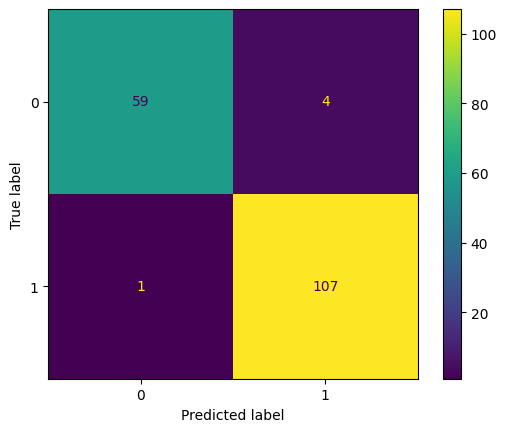

In [24]:
#35
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)


In [25]:
#36
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Accuracy: 0.9707602339181286


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#37
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5]
for i in indices:
    print(f"{load_breast_cancer().feature_names[i]}: {importances[i]:.4f}")


mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1182
mean concavity: 0.0806
worst radius: 0.0780


In [ ]:
#38
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


In [30]:
#39
for depth in [None, 5, 10]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Max Depth {depth}, Accuracy: {accuracy_score(y_test, rf.predict(X_test))}")



Max Depth None, Accuracy: 0.9707602339181286
Max Depth 5, Accuracy: 0.9649122807017544
Max Depth 10, Accuracy: 0.9707602339181286


In [31]:
#41
from sklearn.metrics import roc_auc_score

rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))


ROC AUC: 0.9966931216931216


In [32]:
#42
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9508306163639186


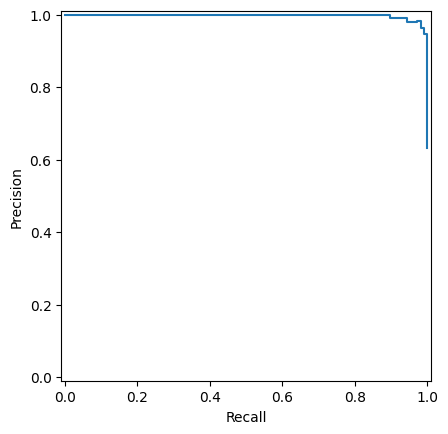

In [33]:
#43
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [34]:
#44
stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Accuracy: 0.9707602339181286


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#45
for bootstrap in [True, False]:
    model = BaggingRegressor(DecisionTreeRegressor(), bootstrap=bootstrap, n_estimators=10, random_state=42)
    model.fit(X_train, y_train)
    print(f"Bootstrap={bootstrap}, MSE: {mean_squared_error(y_test, model.predict(X_test))}")


Bootstrap=True, MSE: 0.03923976608187135
Bootstrap=False, MSE: 0.06245614035087719
